# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Droping of missing data

In [6]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1= ['Gender','Married','Education','Education','Self_Employed','Property_Area','Loan_Status','Dependents']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [9]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [10]:
df=df.drop('Loan_ID',axis=1)

In [11]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [12]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [15]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [17]:
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [18]:
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Hence number of Loan Status is not equal, so SMOTE is applied

In [21]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
x=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of x before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x before SMOTE: (614, 11)
Shape of x after SMOTE: (844, 11)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Loan_Status, dtype: float64

Exploratory Data Analysis

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:xlabel='Dependents', ylabel='count'>

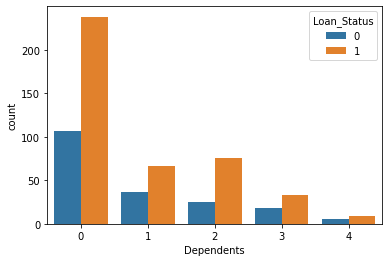

In [26]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

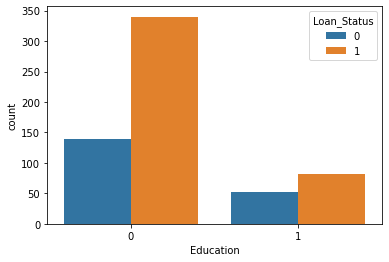

In [27]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

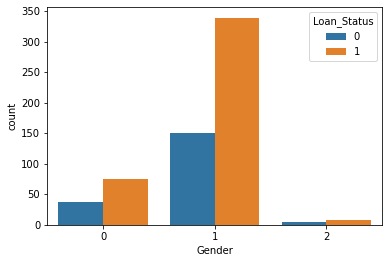

In [28]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

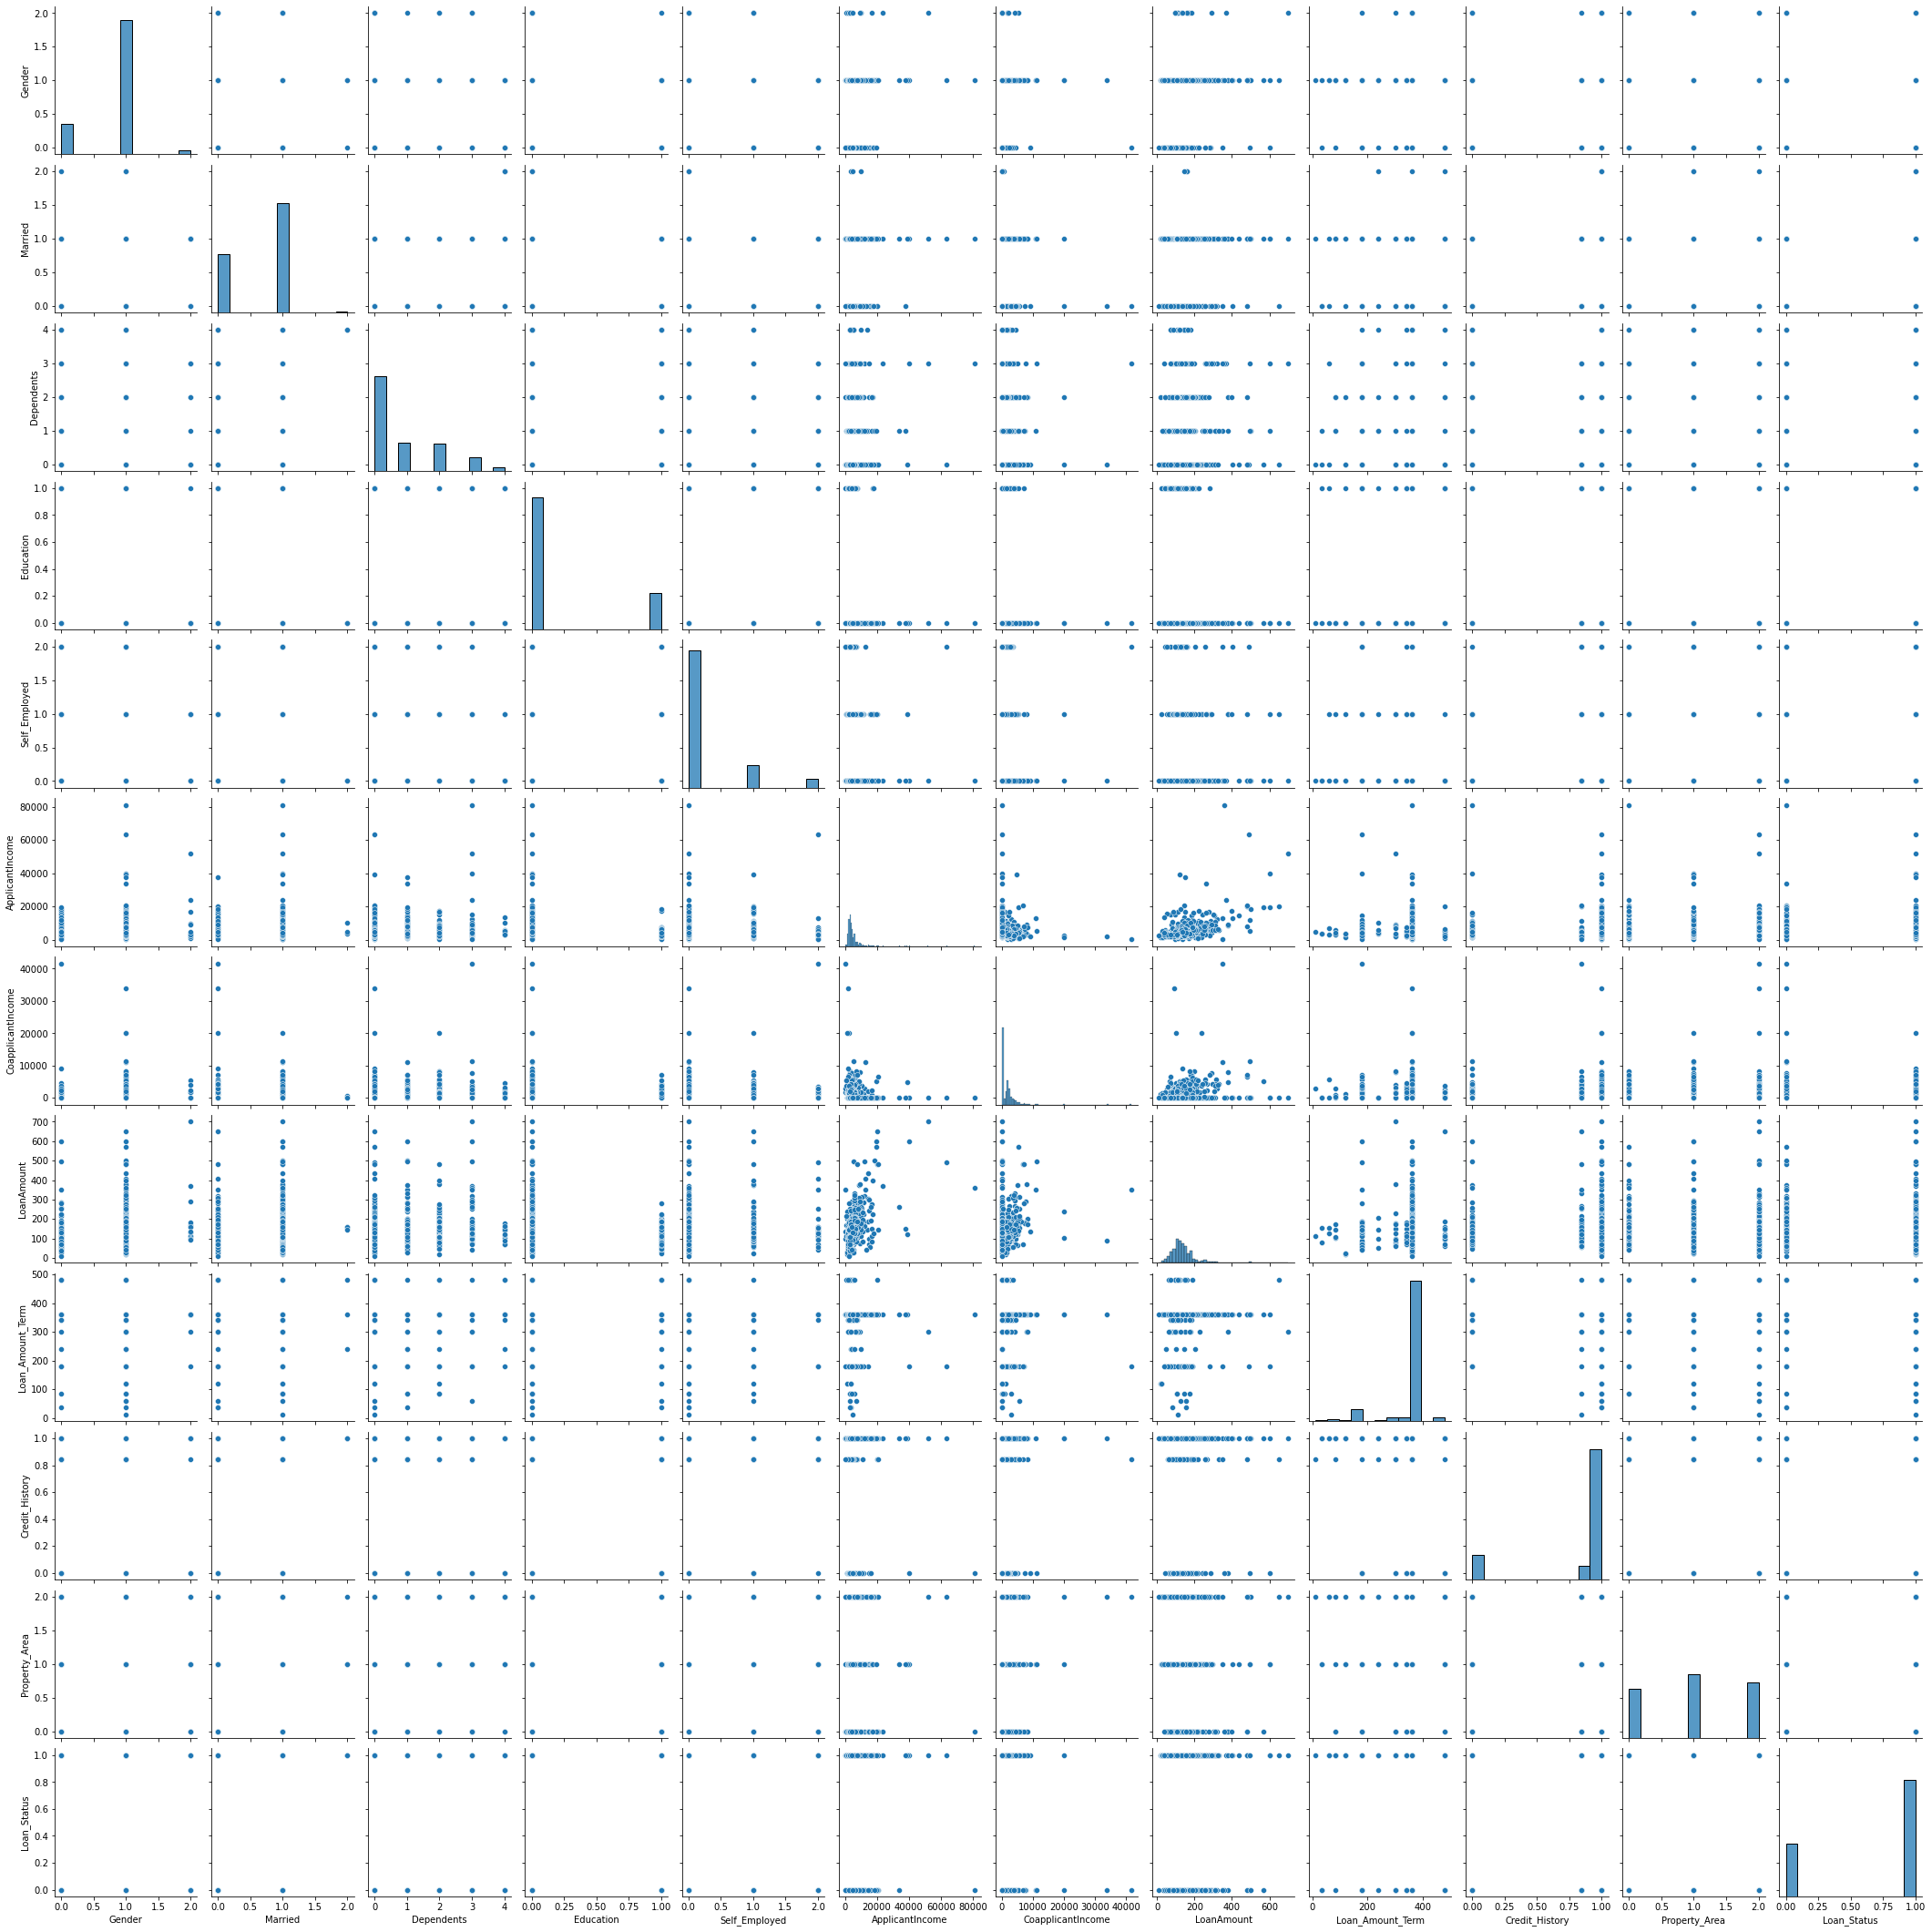

In [29]:
sns.pairplot(df)

In [30]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604], dtype=int64),
 array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
        6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
        4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
        4, 6, 8, 4, 6, 4, 7], dtype=int64))

In [32]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Data Loss

In [33]:
((614-548)/614)*100

10.749185667752444

Hence data loss is about mostly around 10 Percent is acceptable

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df_new_z.corr()['Loan_Status'].sort_values()

Education           -0.103196
LoanAmount          -0.027363
Self_Employed       -0.025740
Loan_Amount_Term    -0.011024
Dependents          -0.005975
ApplicantIncome      0.007848
Gender               0.011524
Property_Area        0.028109
CoapplicantIncome    0.038806
Married              0.102595
Credit_History       0.567327
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [36]:
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [37]:
df=df_new_z

Data Modelling

In [38]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.31380803, -1.33378288, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 , -1.34544474],
       [ 0.31380803,  0.68099491, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       ...,
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  1.24617213, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [-1.81208962, -1.33378288, -0.8492977 , ...,  0.14049153,
        -2.19219037,  0.01120413]])

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.31380803, -1.33378288, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 , -1.34544474],
       [ 0.31380803,  0.68099491, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       ...,
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  1.24617213, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [-1.81208962, -1.33378288, -0.8492977 , ...,  0.14049153,
        -2.19219037,  0.01120413]])

In [41]:
len(x)
len(y)

548

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [43]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.7)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy score is ", round(accuracy_score(y_train,pred_train)*100,1))
        print("Training accuracy score is ", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 106 The model perform very well
At random_state:- 106
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 130 The model perform very well
At random_state:- 130
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 255 The model perform very well
At random_state:- 255
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 286 The model perform very well
At random_state:- 286
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 502 The model perform very well
At random_state:- 502
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 597 The model perform very well
At random_state:- 597
Training accuracy score is  80.5
Training accuracy score is  80.5 


At random state 644 The model perform very well
At random_state:- 644
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 743 The mod

In [44]:
x_train,y_test,y_train,y_test=train_test_split(x,y,test_size=.70,random_state=43)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.37      0.20      0.26       119
           1       0.70      0.85      0.77       265

    accuracy                           0.65       384
   macro avg       0.54      0.52      0.51       384
weighted avg       0.60      0.65      0.61       384



In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 55.729166666666664
[[ 43  76]
 [ 94 171]]
              precision    recall  f1-score   support

           0       0.31      0.36      0.34       119
           1       0.69      0.65      0.67       265

    accuracy                           0.56       384
   macro avg       0.50      0.50      0.50       384
weighted avg       0.58      0.56      0.57       384



GaussianNB Classifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=43)

In [50]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,predict_gnb))
print(confusion_matrix(y_test,predict_gnb))
print(classification_report(y_test,predict_gnb))

0.7603305785123967
[[23 16]
 [13 69]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.61        39
           1       0.81      0.84      0.83        82

    accuracy                           0.76       121
   macro avg       0.73      0.72      0.72       121
weighted avg       0.76      0.76      0.76       121



KNeighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train)
pred_kmn=kmn.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7933884297520661
[[21 18]
 [ 7 75]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63        39
           1       0.81      0.91      0.86        82

    accuracy                           0.79       121
   macro avg       0.78      0.73      0.74       121
weighted avg       0.79      0.79      0.78       121



Support Vector Classifier

In [53]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7933884297520661
[[21 18]
 [ 7 75]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63        39
           1       0.81      0.91      0.86        82

    accuracy                           0.79       121
   macro avg       0.78      0.73      0.74       121
weighted avg       0.79      0.79      0.78       121



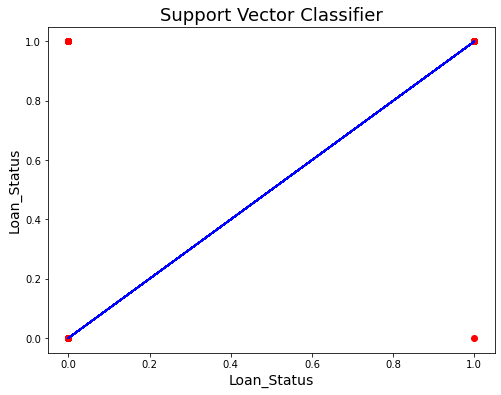

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svc, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Loan_Status',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

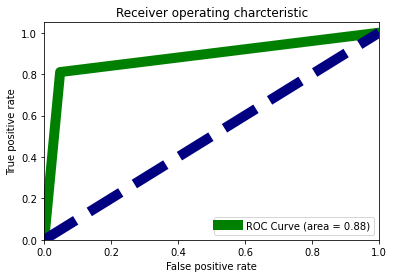

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_svc, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'green', lw=10, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charcteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
import pickle
filename = 'WineQuality.pkl'
pickle.dump(lr, open(filename,'wb'))